# Run WWZ Analysis

In [9]:
import matplotlib.pyplot as plt
import wwzanalysisrunner as wwzar
import numpy as np
import pandas as pd

sigmas = [np.exp(-1.6), np.exp((-1.6-0.25)/2), np.exp(-0.25)]
amplitudes = [0.5, 0.55/2, 0.05]
params = [[None for _ in range(len(amplitudes))] for _ in range(len(sigmas))] 
df = [[None for _ in range(len(amplitudes))] for _ in range(len(sigmas))]

for i in range(len(sigmas)):
    for j in range(len(amplitudes)):
        params[i][j] = wwzar.WwzAnalysisParams()
        params[i][j].sigma = sigmas[i]
        params[i][j].amplitude = amplitudes[j]
        #params.phase = 2
        results = wwzar.WwzAnalysisRunner().run(params=params[i][j], num_iterations=100)
        df[i][j] = pd.DataFrame(results, columns=["is_binary", "period", 'detected_period', 'period_error', 'max_power', 'max_fap_adj', 'num_peaks'])


Execution time: 21.38
Execution time: 21.10
Execution time: 22.20
Execution time: 22.14
Execution time: 22.44


C:\Users\Sanaya\Documents\Sameer\Physics\ksp\project\smbhb_detection\wwz.py:536: RuntimeWarning: divide by zero encountered in divide
  self.wwz = ((self.n_eff - 3.) * self.v_y) \


Execution time: 24.37
Execution time: 23.31
Execution time: 23.98
Execution time: 23.47


## Params: sigma=0.20,amplitude=0.50
# max_power 20 pcntile Binaries: 3264
# max_power 80 pcntile Non-Binaries: 411
## Params: sigma=0.20,amplitude=0.28
# max_power 20 pcntile Binaries: 1100
# max_power 80 pcntile Non-Binaries: 719
## Params: sigma=0.20,amplitude=0.05
# max_power 20 pcntile Binaries: 159
# max_power 80 pcntile Non-Binaries: 603
## Params: sigma=0.40,amplitude=0.50
# max_power 20 pcntile Binaries: 841
# max_power 80 pcntile Non-Binaries: 823
## Params: sigma=0.40,amplitude=0.28
# max_power 20 pcntile Binaries: 335
# max_power 80 pcntile Non-Binaries: 445
## Params: sigma=0.40,amplitude=0.05
# max_power 20 pcntile Binaries: 91
# max_power 80 pcntile Non-Binaries: 523
## Params: sigma=0.78,amplitude=0.50
# max_power 20 pcntile Binaries: 329
# max_power 80 pcntile Non-Binaries: 508
## Params: sigma=0.78,amplitude=0.28
# max_power 20 pcntile Binaries: 172
# max_power 80 pcntile Non-Binaries: 368
## Params: sigma=0.78,amplitude=0.05
# max_power 20 pcntile Binaries: 106
# max

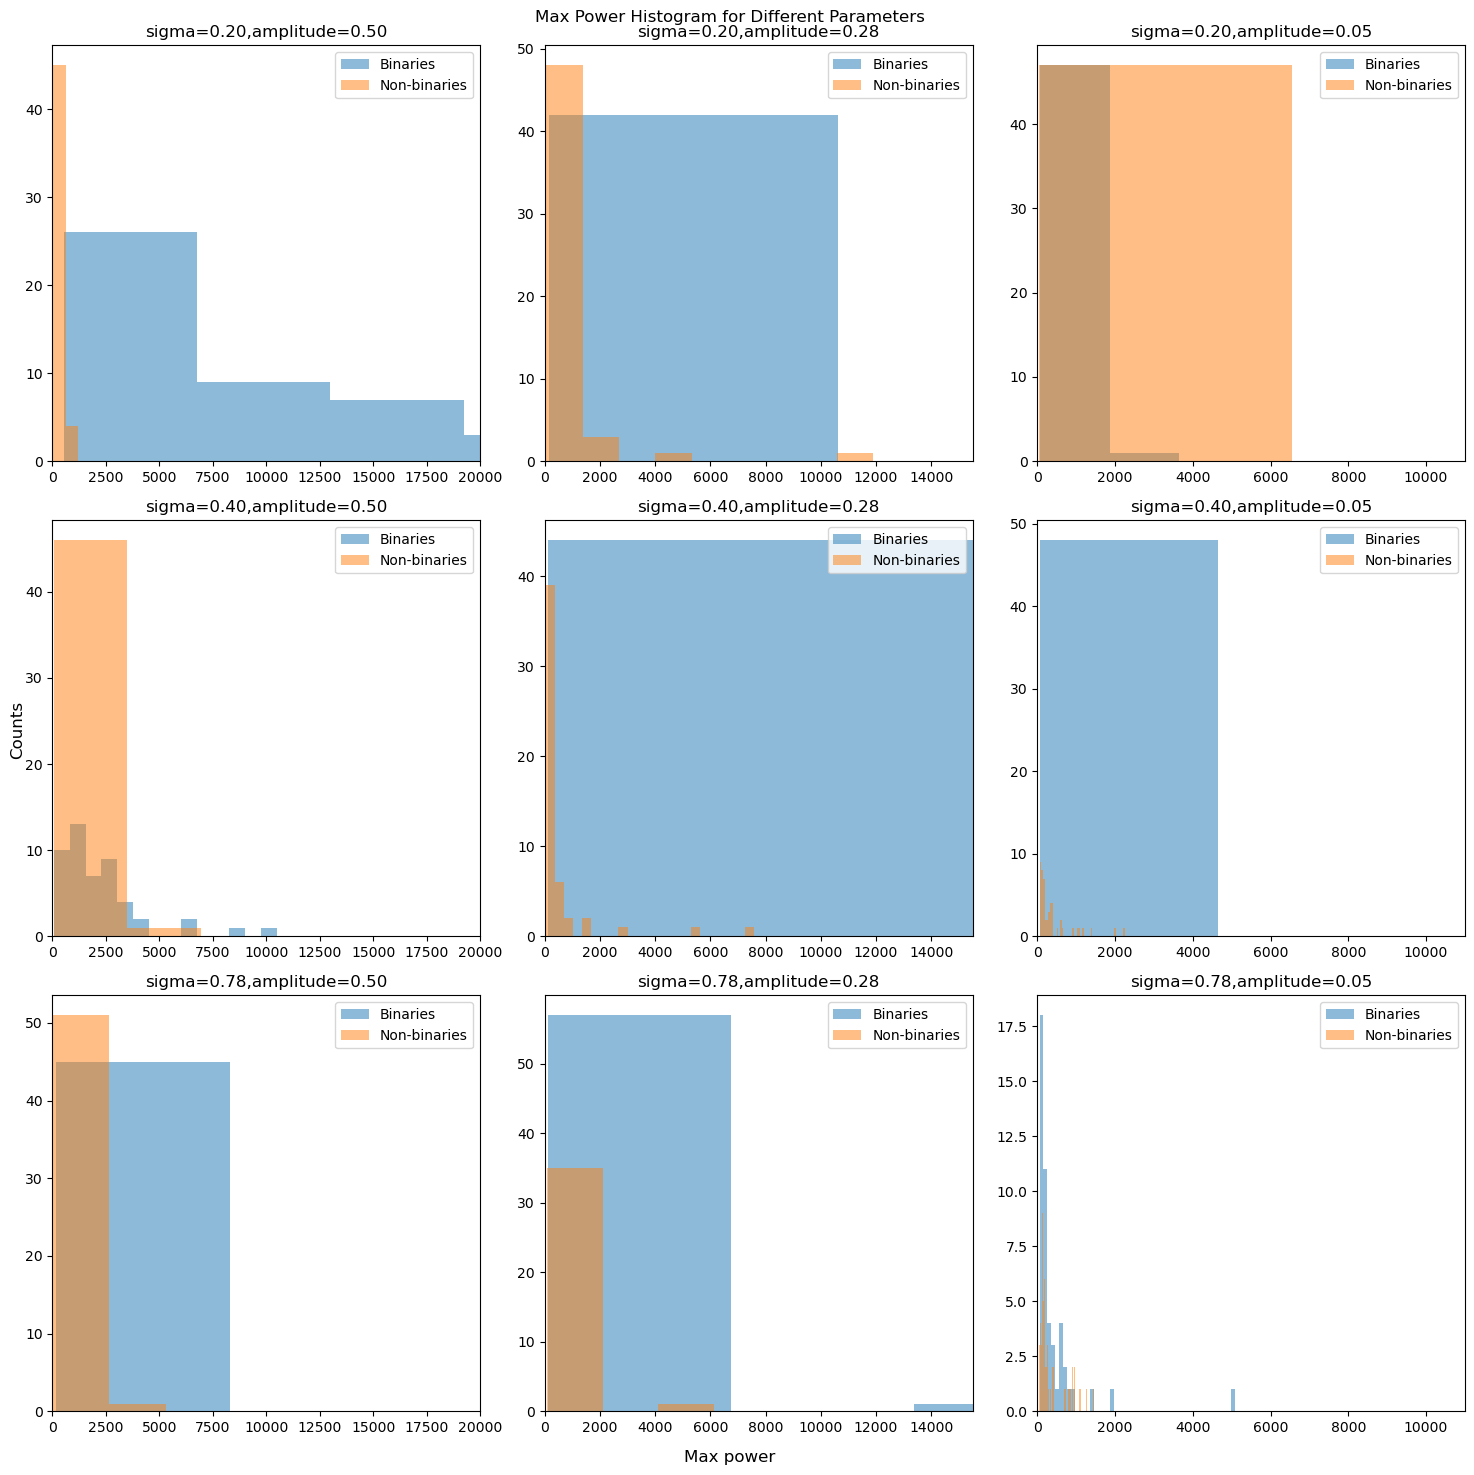

In [24]:
fig, axs = plt.subplots(len(sigmas),len(amplitudes))
fig.suptitle('Max Power Histogram for Different Parameters')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(sigmas)):
    for j in range(len(amplitudes)):
        print("## Params: " + params[i][j].__str__())
        bin_slice = df[i][j].loc[df[i][j]["is_binary"] == True, "max_power"]
        nonbin_slice = df[i][j].loc[df[i][j]["is_binary"] == False, "max_power"]
        print('# max_power 20 pcntile Binaries: {0:.0f}'.format(bin_slice.quantile(0.2)))
        print('# max_power 80 pcntile Non-Binaries: {0:.0f}'.format(nonbin_slice.quantile(0.8)))
        
        axs[i, j].set_title(params[i][j])
        axs[i,j].set_xlim(0,20000*(params[i][j].amplitude)+10000)
        axs[i, j].hist(bin_slice, bins=50, label='Binaries', alpha = 0.5)
        axs[i, j].hist(nonbin_slice, bins=50, label='Non-binaries', alpha = 0.5)        
        axs[i, j].legend()

#axs[0, 0].legend(loc="upper right")
fig.supxlabel('Max power')
fig.supylabel('Counts')

fig.tight_layout()
fig.savefig('output/WWZ - max_power_analysis.png')
plt.show()
